In [110]:
!pip install openpyxl
!pip install seaborn
!pip install statsmodels

  Using cached statsmodels-0.14.2-cp310-cp310-macosx_11_0_arm64.whl.metadata (9.2 kB)
  Using cached patsy-0.5.6-py2.py3-none-any.whl.metadata (3.5 kB)
Using cached statsmodels-0.14.2-cp310-cp310-macosx_11_0_arm64.whl (10.1 MB)
Using cached patsy-0.5.6-py2.py3-none-any.whl (233 kB)


In [270]:
!pip install statsforecast

  Using cached numba-0.59.1-cp310-cp310-macosx_11_0_arm64.whl.metadata (2.7 kB)
  Using cached tqdm-4.66.4-py3-none-any.whl.metadata (57 kB)
  Using cached llvmlite-0.42.0-cp310-cp310-macosx_11_0_arm64.whl.metadata (4.8 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 kB 1.2 MB/s eta 0:00:00ta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 340.2/340.2 kB 3.1 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 278.2/278.2 kB 7.0 MB/s eta 0:00:0000:01
Using cached numba-0.59.1-cp310-cp310-macosx_11_0_arm64.whl (2.6 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.5/40.5 kB 3.0 MB/s eta 0:00:00
Using cached tqdm-4.66.4-py3-none-any.whl (78 kB)
Using cached llvmlite-0.42.0-cp310-cp310-macosx_11_0_arm64.whl (28.8 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.1/62.1 kB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.3/135.3 kB 6.0 MB/s eta 0:00:00


In [111]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [113]:
Data = pd.read_excel("../Data/Case Study_2024.xlsx",sheet_name='Raw Data',header=1)

In [114]:
# Data.columns = ['City', 'Year', 'Month', 'Unit Sales', 'Revenue']

In [115]:
# Month mapping
Data['Month_Year'] = Data['Month'].astype(str)+"-"+Data['Year'].astype(str)

month_mapping = {
    'Jan': 1, 'Feb': 2, 'Mar': 3, 'Apr': 4,
    'May': 5, 'Jun': 6, 'Jul': 7, 'Aug': 8,
    'Sep': 9, 'Oct': 10, 'Nov': 11, 'Dec': 12
}
Data['Month'] = Data['Month'].map(month_mapping)
Data['Date'] = pd.to_datetime(Data[['Year', 'Month']].assign(DAY=1))

Data['Actual_Price'] = 250


In [116]:
Data

,City,Year,Month,Unit Sales,Revenue $,Month_Year,Date,Actual_Price
0,1,2015,1,10639,2659750,Jan-2015,2015-01-01,250
1,2,2015,1,24232,6058000,Jan-2015,2015-01-01,250
2,3,2015,1,11861,2965250,Jan-2015,2015-01-01,250
3,4,2015,1,51507,12876750,Jan-2015,2015-01-01,250
4,1,2015,2,15256,3814000,Feb-2015,2015-02-01,250
...,...,...,...,...,...,...,...,...
427,4,2023,11,70126,17531500,Nov-2023,2023-11-01,250
428,1,2023,12,29061,7265250,Dec-2023,2023-12-01,250
429,2,2023,12,76623,19155750,Dec-2023,2023-12-01,250
430,3,2023,12,18420,4605000,Dec-2023,2023-12-01,250


In [117]:
Data['Discount'] = ((Data['Unit Sales'] * Data['Actual_Price']) - Data['Revenue $']) / Data['Unit Sales']

In [118]:
Data['Discount_Flag'] = (Data['Discount']>0).astype(int)

In [120]:
Data.nlargest(10, 'Discount')


,City,Year,Month,Unit Sales,Revenue $,Month_Year,Date,Actual_Price,Discount,Discount_Flag
337,2,2022,1,43154,6473100,Jan-2022,2022-01-01,250,100.0,1
341,2,2022,2,41715,6257250,Feb-2022,2022-02-01,250,100.0,1
345,2,2022,3,50551,7582650,Mar-2022,2022-03-01,250,100.0,1
215,4,2019,6,96210,17221590,Jun-2019,2019-06-01,250,71.0,1
219,4,2019,7,119227,21341633,Jul-2019,2019-07-01,250,71.0,1
223,4,2019,8,101262,18125898,Aug-2019,2019-08-01,250,71.0,1
99,4,2017,1,79742,15868658,Jan-2017,2017-01-01,250,51.0,1
103,4,2017,2,82494,16416306,Feb-2017,2017-02-01,250,51.0,1
107,4,2017,3,81305,16179695,Mar-2017,2017-03-01,250,51.0,1
165,2,2018,6,51268,10202332,Jun-2018,2018-06-01,250,51.0,1


In [132]:
city_2_data = Data[Data['City'] == 2]
city_2_data.reset_index(drop=True, inplace=True)
highest_discount_indices = city_2_data['Discount'].nlargest(10).index
prior_indices = highest_discount_indices - 2
after_indices = highest_discount_indices + 2

pd.concat([city_2_data.iloc[prior_indices],city_2_data.iloc[highest_discount_indices],city_2_data.iloc[after_indices]]).drop_duplicates().sort_index()

,City,Year,Month,Unit Sales,Revenue $,Month_Year,Date,Actual_Price,Discount,Discount_Flag,Sales Growth,Sales Lift
39,2,2018,4,28231,7057750,Apr-2018,2018-04-01,250,0.0,0,-0.104574,-0.251432
40,2,2018,5,27523,6880750,May-2018,2018-05-01,250,0.0,0,-0.025079,-0.270205
41,2,2018,6,51268,10202332,Jun-2018,2018-06-01,250,51.0,1,0.862733,0.359413
42,2,2018,7,67963,13524637,Jul-2018,2018-07-01,250,51.0,1,0.325642,0.802095
43,2,2018,8,73706,14667494,Aug-2018,2018-08-01,250,51.0,1,0.084502,0.954375
44,2,2018,9,61331,12204869,Sep-2018,2018-09-01,250,51.0,1,-0.167897,0.626242
45,2,2018,10,56371,11217829,Oct-2018,2018-10-01,250,51.0,1,-0.080873,0.494723
46,2,2018,11,67596,13451604,Nov-2018,2018-11-01,250,51.0,1,0.199127,0.792363
47,2,2018,12,84090,16733910,Dec-2018,2018-12-01,250,51.0,1,0.244009,1.229715
48,2,2019,1,28574,7143500,Jan-2019,2019-01-01,250,0.0,0,-0.660197,-0.242337


In [123]:
# city_4_data = Data[Data['City'] == 4]
# city_4_data.reset_index(drop=True, inplace=True)
# highest_discount_indices = city_4_data['Discount'].nlargest(10).index
# prior_indices = highest_discount_indices - 2
# after_indices = highest_discount_indices + 2

# pd.concat([city_4_data.iloc[prior_indices],city_4_data.iloc[highest_discount_indices],city_4_data.iloc[after_indices]]).drop_duplicates().sort_index()


In [122]:
# city_3_data = Data[Data['City'] == 3]
# city_3_data.reset_index(drop=True, inplace=True)
# highest_discount_indices = city_3_data['Discount'].nlargest(20).index
# prior_indices = highest_discount_indices - 2
# after_indices = highest_discount_indices + 2

# pd.concat([city_3_data.iloc[prior_indices],city_3_data.iloc[highest_discount_indices],city_3_data.iloc[after_indices]]).drop_duplicates().sort_index()


## 1)  The product sells for $250. At times, however, the product has been discounted to drive sales. Which city had the most significant price discount and when did this occur?

In [124]:
Data.loc[Data.groupby('City')['Discount'].idxmax()]

,City,Year,Month,Unit Sales,Revenue $,Month_Year,Date,Actual_Price,Discount,Discount_Flag
0,1,2015,1,10639,2659750,Jan-2015,2015-01-01,250,0.0,0
337,2,2022,1,43154,6473100,Jan-2022,2022-01-01,250,100.0,1
314,3,2021,7,21942,4366458,Jul-2021,2021-07-01,250,51.0,1
215,4,2019,6,96210,17221590,Jun-2019,2019-06-01,250,71.0,1


In [136]:
Data['Discount_Flag'].value_counts(normalize=True)

0    0.87963
1    0.12037
Name: Discount_Flag, dtype: float64

In [143]:
Data[Data['City']==4]['Discount_Flag'].value_counts(normalize=True)

0    0.851852
1    0.148148
Name: Discount_Flag, dtype: float64

## Price/Discount sensitivity 

In [144]:
# Prepare the data by calculating the actual price
Data['Actual Price'] = Data['Revenue $'] / Data['Unit Sales']

City_data = Data[Data['City']==2]

# Perform a regression analysis with unit sales as the dependent variable and actual price as the independent variable
X_price = City_data[['Actual Price']]
y_sales = City_data['Unit Sales']
X_price = sm.add_constant(X_price)  # Add a constant term to the predictor

model_price_sales = sm.OLS(y_sales, X_price).fit()
price_sales_summary = model_price_sales.summary()

price_sales_summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Unit Sales   R-squared:                       0.098
Model:                            OLS   Adj. R-squared:                  0.089
Method:                 Least Squares   F-statistic:                     11.51
Date:                Wed, 29 May 2024   Prob (F-statistic):           0.000975
Time:                        13:27:38   Log-Likelihood:                -1184.2
No. Observations:                 108   AIC:                             2372.
Df Residuals:                     106   BIC:                             2378.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           9.9e+04    1.6e+04      6.197      0.000    6.73e+04    1.31e+05
Actual Price  -222.8458     65.689     -3.392      0.001    -353.081     -92.611
==============================================================================
Omnibus:                       11.893   Durbin-Watson:                   1.019
Prob(Omnibus):                  0.003   Jarque-Bera (JB):                6.025
Skew:                           0.376   Prob(JB):                       0.0492
Kurtosis:                       2.120   Cond. No.                     2.86e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.86e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [145]:
# Prepare the data by calculating the actual price
Data['Actual Price'] = Data['Revenue $'] / Data['Unit Sales']

City_data = Data[Data['City']==3]

# Perform a regression analysis with unit sales as the dependent variable and actual price as the independent variable
X_price = City_data[['Actual Price']]
y_sales = City_data['Unit Sales']
X_price = sm.add_constant(X_price)  # Add a constant term to the predictor

model_price_sales = sm.OLS(y_sales, X_price).fit()
price_sales_summary = model_price_sales.summary()

price_sales_summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Unit Sales   R-squared:                       0.306
Model:                            OLS   Adj. R-squared:                  0.300
Method:                 Least Squares   F-statistic:                     46.83
Date:                Wed, 29 May 2024   Prob (F-statistic):           5.18e-10
Time:                        13:27:48   Log-Likelihood:                -1045.5
No. Observations:                 108   AIC:                             2095.
Df Residuals:                     106   BIC:                             2100.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         6.201e+04   6752.030      9.185      0.000    4.86e+04    7.54e+04
Actual Price  -188.9503     27.611     -6.843      0.000    -243.693    -134.208
==============================================================================
Omnibus:                       11.376   Durbin-Watson:                   0.885
Prob(Omnibus):                  0.003   Jarque-Bera (JB):                6.940
Skew:                           0.462   Prob(JB):                       0.0311
Kurtosis:                       2.169   Cond. No.                     4.39e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.39e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [146]:
# Prepare the data by calculating the actual price
Data['Actual Price'] = Data['Revenue $'] / Data['Unit Sales']

City_data = Data[Data['City']==4]

# Perform a regression analysis with unit sales as the dependent variable and actual price as the independent variable
X_price = City_data[['Actual Price']]
y_sales = City_data['Unit Sales']
X_price = sm.add_constant(X_price)  # Add a constant term to the predictor

model_price_sales = sm.OLS(y_sales, X_price).fit()
price_sales_summary = model_price_sales.summary()

price_sales_summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Unit Sales   R-squared:                       0.398
Model:                            OLS   Adj. R-squared:                  0.393
Method:                 Least Squares   F-statistic:                     70.20
Date:                Wed, 29 May 2024   Prob (F-statistic):           2.43e-13
Time:                        13:27:52   Log-Likelihood:                -1151.2
No. Observations:                 108   AIC:                             2306.
Df Residuals:                     106   BIC:                             2312.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         1.888e+05   1.46e+04     12.953      0.000     1.6e+05    2.18e+05
Actual Price  -500.0519     59.683     -8.378      0.000    -618.379    -381.725
==============================================================================
Omnibus:                        2.101   Durbin-Watson:                   0.535
Prob(Omnibus):                  0.350   Jarque-Bera (JB):                2.136
Skew:                           0.316   Prob(JB):                        0.344
Kurtosis:                       2.727   Cond. No.                     3.56e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.56e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [147]:
Data

,City,Year,Month,Unit Sales,Revenue $,Month_Year,Date,Actual_Price,Discount,Discount_Flag,Sales Growth,Sales Lift,Actual Price
0,1,2015,1,10639,2659750,Jan-2015,2015-01-01,250,0.0,0,NaN,-0.717898,250.0
1,2,2015,1,24232,6058000,Jan-2015,2015-01-01,250,0.0,0,NaN,-0.357469,250.0
2,3,2015,1,11861,2965250,Jan-2015,2015-01-01,250,0.0,0,NaN,-0.685496,250.0
3,4,2015,1,51507,12876750,Jan-2015,2015-01-01,250,0.0,0,NaN,0.365750,250.0
4,1,2015,2,15256,3814000,Feb-2015,2015-02-01,250,0.0,0,0.433969,-0.595475,250.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
427,4,2023,11,70126,17531500,Nov-2023,2023-11-01,250,0.0,0,-0.069490,0.859448,250.0
428,1,2023,12,29061,7265250,Dec-2023,2023-12-01,250,0.0,0,-0.093572,-0.229424,250.0
429,2,2023,12,76623,19155750,Dec-2023,2023-12-01,250,0.0,0,0.380669,1.031722,250.0
430,3,2023,12,18420,4605000,Dec-2023,2023-12-01,250,0.0,0,0.182209,-0.511579,250.0


In [190]:
# Step 3: Calculate the average lift in unit sales by discount
def average_lift_in_unit_sales(city_data):
    avg_sales_discounted = city_data[city_data['Discount'] > 0]['Unit Sales'].mean()
    avg_sales_non_discounted = city_data[city_data['Discount'] == 0]['Unit Sales'].mean()
    lift = avg_sales_discounted - avg_sales_non_discounted
    return lift

average_lift_by_city = Data.groupby('City').apply(average_lift_in_unit_sales)

In [197]:
lift = pd.DataFrame(average_lift_by_city.reset_index())
lift.columns = ['City', 'Average Lift in Unit Sales by Discount']

In [207]:
round(lift)

,City,Average Lift in Unit Sales by Discount
0,1,NaN
1,2,17950.0
2,3,7259.0
3,4,17632.0


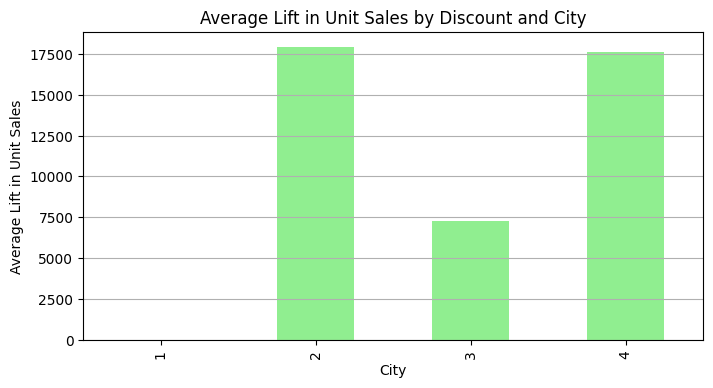

In [202]:
# Bar Chart for Average Lift in Unit Sales by Discount and City
plt.figure(figsize=(8, 4))
average_lift_by_city.plot(kind='bar', color='lightgreen')
plt.title('Average Lift in Unit Sales by Discount and City')
plt.xlabel('City')
plt.ylabel('Average Lift in Unit Sales')
plt.grid(axis='y')
plt.show()

# Forecasting

- Average seasonality in the city for previous years.
- leading to decision of using this as a feature in the data.
- Use Auto-Arima to build the base forecasting model.
- inhouse similar products launch? or known competetors

In [221]:
!pip install pmdarima

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 628.6/628.6 kB 2.1 MB/s eta 0:00:00a 0:00:01m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 9.5 MB/s eta 0:00:00ta 0:00:01


In [250]:
from pmdarima import auto_arima
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error
from statsmodels.tsa.holtwinters import ExponentialSmoothing

import warnings
# Ignore all warnings
warnings.filterwarnings("ignore")


In [230]:
# Prepare the data with required features
Data['Quarter'] = Data['Date'].dt.quarter
Data['Previous Year Sales'] = Data.groupby('City')['Unit Sales'].shift(12)
data = Data.dropna(subset=['Previous Year Sales'])

# Select relevant features for forecasting
features = ['Month', 'Quarter', 'Previous Year Sales', 'Discount']
target = 'Unit Sales'

# One-hot encode categorical variables
data_encoded = pd.get_dummies(data[['City'] + features], columns=['City', 'Month', 'Quarter'])
data_encoded['Unit Sales'] = data['Unit Sales']

In [231]:
data_encoded

,Previous Year Sales,Discount,City_1,City_2,City_3,City_4,Month_1,Month_2,Month_3,Month_4,...,Month_8,Month_9,Month_10,Month_11,Month_12,Quarter_1,Quarter_2,Quarter_3,Quarter_4,Unit Sales
48,10639.0,0.0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,12292
49,24232.0,0.0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,24731
50,11861.0,0.0,0,0,1,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,11978
51,51507.0,0.0,0,0,0,1,1,0,0,0,...,0,0,0,0,0,1,0,0,0,50786
52,15256.0,0.0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,16025
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
427,72437.0,0.0,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,1,70126
428,32289.0,0.0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,29061
429,69557.0,0.0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,76623
430,19829.0,0.0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,18420


In [232]:
# Prepare the exogenous variables (X) and target variable (y)
train_data = data_encoded[data['Year'] < 2023]
test_data = data_encoded[data['Year'] == 2023]
train_exog = train_data.drop(columns=['Unit Sales'])
test_exog = test_data.drop(columns=['Unit Sales'])
train_target = train_data['Unit Sales']
test_target = test_data['Unit Sales']

## Baseline - 1

In [255]:
# Baseline Model: Previous Year's Same Month Average
def previous_two_year_avg(train, test, date_col='Date', target_col='Unit Sales', city_col='City'):
    predictions = []
    for idx, row in test.iterrows():
        city = row[city_col]
        same_month_last_two_years = train[(train[city_col] == city) & 
                                          (train[date_col].dt.month == row[date_col].month) & 
                                          (train[date_col].dt.year.isin([row[date_col].year - 1, row[date_col].year - 2]))]
        if not same_month_last_two_years.empty:
            avg_sales = same_month_last_two_years.groupby([city_col, same_month_last_two_years[date_col].dt.year])[target_col].mean().mean()
        else:
            avg_sales = train[train[city_col] == city][target_col].mean()  # Fallback to overall city average
        predictions.append(avg_sales)
    return np.array(predictions)

prev_year_predictions = previous_two_year_avg(data[data['Year'].isin([2021,2020])], data[data['Year'] == 2023])
mape_prev_year = mean_absolute_percentage_error(test_target, prev_year_predictions)
mae_prev_year = mean_absolute_error(test_target, prev_year_predictions)

# Example usage
data['Date'] = pd.to_datetime(data['Date'])
train_data = data[data['Year'].isin([2021, 2020])]
test_data = data[data['Year'] == 2023]

# Initialize dictionaries to store metrics for each city
city_mape = {}
city_mae = {}

# Calculate metrics for each city
for city in test_data['City'].unique():
    city_test_data = test_data[test_data['City'] == city]
    city_test_target = city_test_data['Unit Sales']
    prev_two_year_predictions = previous_two_year_avg(train_data, city_test_data)
    
    mape_prev_two_year = mean_absolute_percentage_error(city_test_target, prev_two_year_predictions)
    mae_prev_two_year = mean_absolute_error(city_test_target, prev_two_year_predictions)
    
    city_mape[city] = mape_prev_two_year
    city_mae[city] = mae_prev_two_year

# Print the metrics for each city
for city in city_mape.keys():
    print(f'City: {city} - Previous Two Years Average MAPE: {round(city_mape[city],2)} , MAE: {round(city_mae[city])}')

City: 1 - Previous Two Years Average MAPE: 0.25 , MAE: 5295
City: 2 - Previous Two Years Average MAPE: 0.07 , MAE: 3045
City: 3 - Previous Two Years Average MAPE: 0.26 , MAE: 3726
City: 4 - Previous Two Years Average MAPE: 0.16 , MAE: 15040


# Baseline - 2

In [257]:
def exponential_smoothing(train, test, target_col='Unit Sales', city_col='City'):
    predictions = []
    for city in test[city_col].unique():
        city_train = train[train[city_col] == city][target_col]
        if len(city_train) > 0:
            model = ExponentialSmoothing(city_train, seasonal='add', seasonal_periods=12).fit()
            city_test = test[test[city_col] == city]
            preds = model.predict(start=len(city_train), end=len(city_train) + len(city_test) - 1)
            predictions.extend(preds)
        else:
            predictions.extend([np.nan] * len(test[test[city_col] == city]))
    return np.array(predictions)

# Example usage
data['Date'] = pd.to_datetime(data['Date'])
train_data = data[data['Year'] < 2023]
test_data = data[data['Year'] == 2023]

# Initialize dictionaries to store metrics for each city
city_mape = {}
city_mae = {}

# Calculate metrics for each city
for city in test_data['City'].unique():
    city_test_data = test_data[test_data['City'] == city]
    city_test_target = city_test_data['Unit Sales']
    exp_smoothing_predictions = exponential_smoothing(train_data, city_test_data)
    
    # Ensure no NaN values before calculating metrics
    valid_indices = ~np.isnan(exp_smoothing_predictions)
    if valid_indices.sum() > 0:
        mape_exp_smoothing = mean_absolute_percentage_error(city_test_target[valid_indices], exp_smoothing_predictions[valid_indices])
        mae_exp_smoothing = mean_absolute_error(city_test_target[valid_indices], exp_smoothing_predictions[valid_indices])
    else:
        mape_exp_smoothing = np.nan
        mae_exp_smoothing = np.nan
    
    city_mape[city] = mape_exp_smoothing
    city_mae[city] = mae_exp_smoothing

# Print the metrics for each city
for city in city_mape.keys():
    print(f'City: {city} - Previous Two Years Average MAPE: {round(city_mape[city],2)} , MAE: {round(city_mae[city])}')

City: 1 - Previous Two Years Average MAPE: 0.14 , MAE: 2995
City: 2 - Previous Two Years Average MAPE: 0.11 , MAE: 4274
City: 3 - Previous Two Years Average MAPE: 0.1 , MAE: 1483
City: 4 - Previous Two Years Average MAPE: 0.11 , MAE: 9832


## Forecasting Algo 

In [263]:
data

,City,Year,Month,Unit Sales,Revenue $,Month_Year,Date,Actual_Price,Discount,Discount_Flag,Sales Growth,Sales Lift,Actual Price,Previous Year Sales,Quarter
48,1,2016,1,12292,3073000,Jan-2016,2016-01-01,250,0.0,0,-0.547839,-0.674068,250.0,10639.0,1
49,2,2016,1,24731,6182750,Jan-2016,2016-01-01,250,0.0,0,-0.623651,-0.344237,250.0,24232.0,1
50,3,2016,1,11978,2994500,Jan-2016,2016-01-01,250,0.0,0,-0.466007,-0.682394,250.0,11861.0,1
51,4,2016,1,50786,12696500,Jan-2016,2016-01-01,250,0.0,0,-0.028986,0.346632,250.0,51507.0,1
52,1,2016,2,16025,4006250,Feb-2016,2016-02-01,250,0.0,0,0.303693,-0.575084,250.0,15256.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
427,4,2023,11,70126,17531500,Nov-2023,2023-11-01,250,0.0,0,-0.069490,0.859448,250.0,72437.0,4
428,1,2023,12,29061,7265250,Dec-2023,2023-12-01,250,0.0,0,-0.093572,-0.229424,250.0,32289.0,4
429,2,2023,12,76623,19155750,Dec-2023,2023-12-01,250,0.0,0,0.380669,1.031722,250.0,69557.0,4
430,3,2023,12,18420,4605000,Dec-2023,2023-12-01,250,0.0,0,0.182209,-0.511579,250.0,19829.0,4


In [265]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Prepare the training data (data before 2023)
train_data = data[data['Year'] < 2023]

# Separate the exogenous variable (Discount_Flag)
train_exog = train_data[['Discount_Flag']]
train_target = train_data['Unit Sales']

# Build and fit the Auto-ARIMA model
auto_arima_model = auto_arima(train_target, exogenous=train_exog, seasonal=True, m=12, trace=True, error_action='ignore', suppress_warnings=True)
auto_arima_model.fit(train_target, exogenous=train_exog)

# Prepare the testing data (data for 2023)
test_data = data[data['Year'] == 2023]
test_exog = test_data[['Discount_Flag']]

# Predict the Unit Sales for 2023
arima_predictions = auto_arima_model.predict(n_periods=len(test_data), exogenous=test_exog)

# Build and fit the SARIMA model
sarima_model = SARIMAX(train_target, exog=train_exog, order=auto_arima_model.order, seasonal_order=auto_arima_model.seasonal_order)
sarima_model_fit = sarima_model.fit(disp=False)

# Predict the Unit Sales for 2023 using the SARIMA model
sarima_predictions = sarima_model_fit.predict(start=len(train_target), end=len(train_target) + len(test_data) - 1, exog=test_exog)

# Combine the predictions with the actual test data
test_data['ARIMA_Predictions'] = [arima_predictions]
test_data['SARIMA_Predictions'] = [sarima_predictions]

# Display the predictions
test_data.head()


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=inf, Time=1.00 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=8045.415, Time=0.01 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=7431.076, Time=0.06 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=7725.186, Time=0.06 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=8043.427, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=7583.504, Time=0.01 sec
 ARIMA(1,1,0)(2,0,0)[12] intercept   : AIC=7425.522, Time=0.45 sec
 ARIMA(1,1,0)(2,0,1)[12] intercept   : AIC=7395.146, Time=0.47 sec
 ARIMA(1,1,0)(1,0,1)[12] intercept   : AIC=7384.889, Time=0.32 sec
 ARIMA(1,1,0)(0,0,1)[12] intercept   : AIC=7484.559, Time=0.04 sec
 ARIMA(1,1,0)(1,0,2)[12] intercept   : AIC=7393.641, Time=0.84 sec
 ARIMA(1,1,0)(0,0,2)[12] intercept   : AIC=7455.473, Time=0.55 sec
 ARIMA(1,1,0)(2,0,2)[12] intercept   : AIC=7393.485, Time=1.05 sec
 ARIMA(0,1,0)(1,0,1)[12] intercept   : AIC=7443.548, Time=0.33 sec
 ARIMA(2,1,0)(1,0,1)[12]

ValueError: Length of values (1) does not match length of index (48)

In [266]:
sarima_predictions

336     33704.988699
337     48913.400665
338     20715.553537
339    100280.470930
340     37499.718412
341     54567.933156
342     23592.407101
343     95639.498142
344     35488.376641
345     59474.454560
346     23378.497543
347     98003.256844
348     34599.021885
349     50353.215619
350     22283.574525
351     83806.089421
352     39049.651626
353     56087.495506
354     25167.464786
355     79175.080359
356     37042.135812
357     60985.261018
358     24953.942407
359     81534.606747
360     36154.373732
361     51880.355835
362     23860.980111
363     85273.324308
364     40597.033563
365     57604.367130
366     26739.706080
367     80650.608170
368     38593.112683
369     62493.362027
370     26526.566063
371     83005.909265
372     37706.940352
373     53404.761343
374     25435.560977
375     86737.931763
376     42141.644543
377     59118.522434
378     28309.131902
379     82123.493697
380     40141.312161
381     63998.762423
382     28096.373563
383     84474